## 1. 绘制随机漫步图
#### 思路：
1. 随机设置漫步路线散点
2. 在随机散点间移动

#### 可视化实现：    
1. 设置两列散点，供给x，y       
2. 绘制子图   
plt.subplot(221)  221表示两行两列第一个图    
3. 依据随机结果绘制散点    
plt.scatter( ) 
4. 给散点连线     
plt.plot( )  
5. 去掉x轴数字  sub.get_xaxis().set_ticks([])      
设置x轴标签位置 sub.xaxis.set_label_coords()  
设置x轴标签 plt.xlabel()

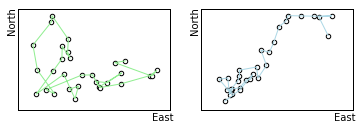

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

step = np.random.randint(1,5, 30)
angle = np.radians(np.random.randint(0, 300, 30))
x = np.cumsum(step*np.cos(angle))
y = np.cumsum(step*np.sin(angle))

step1 = np.random.randint(1,5, 30)
angle1 = np.radians(np.random.randint(0, 300, 30))
x1 = np.cumsum(step1*np.cos(angle1))
y1 = np.cumsum(step1*np.sin(angle1))

plt.figure()

plt.subplot(221)
plt.scatter(x, y, color = '1.0', edgecolor='0.0')
plt.plot(x, y, color= 'lightgreen')
sub = plt.gca()
sub.axes.get_xaxis().set_ticks([])
sub.axes.get_yaxis().set_ticks([])
sub.xaxis.set_label_coords(0.95, -0.025)
sub.yaxis.set_label_coords(-0.005, 0.88)
plt.xlabel('East')
plt.ylabel('North')

plt.subplot(222)
plt.scatter(x1, y1, color = '1.0', edgecolor='0.0')
plt.plot(x1, y1, color= 'lightblue')
sub = plt.gca()
sub.axes.get_xaxis().set_ticks([])
sub.axes.get_yaxis().set_ticks([])
sub.xaxis.set_label_coords(0.95, -0.025)
sub.yaxis.set_label_coords(-0.005, 0.88)
plt.xlabel('East')
plt.ylabel('North')

plt.show()

## 2. 绘制二次函数图像与梯形法解定积分示图
#### 思路：
1. 绘制二次函数图像
2. 绘制梯形，先用 stemline 画梯形截点和底边，再用 plot 连接各点  
(点数少出来的是直线，点数多出来的是曲线)

#### 可视化实现：
1. 用 numpy 的 poly1d 与 linspace 函数初始化 x，y
2. 画二次函数图像 plt.plot( )
3. 画梯形，用 stemline 画梯形底边，用 plot 连接各点
4. 给梯形填色   
获取图像 plt.gca()   
填色 fill_between()   
4. 用 legend 标出函数式，二次函数 x^2+2x+10 在区域 (-10,10) 内的定积分

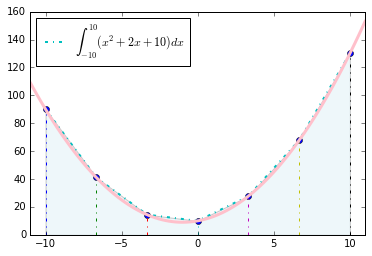

In [22]:
import matplotlib.pyplot as plt
p = np.poly1d( [1, 2, 10]) 
x1 = np.linspace(-11, 11, 100)
x2 = np.linspace(-10, 10, 7)
y1 = p(x1)
y2 = p(x2)

plt.xlim(-11, 11)

#下面这段先画了梯形，再画了二次函数图像
stemline = plt.stem(x2, y2, '-.')
plt.plot(x2, y2, '-.', linewidth=2, color='c')

plt.plot(x1, y1, color='pink', linewidth=3)

ax = plt.gca()
ax.fill_between(x2, y2, where=y2>0, facecolor='lightblue', alpha=0.2)

plt.legend(['$\int_{-10}^{10}(x^2+2x+10)dx$'], loc=2)

plt.show()

## 3. 用ipywidgets.interact绘制函数图像
#### 图形用户界面展示函数图像：
函数还是第二题辣个函数，但正好用ipywidgets.interact来围观一下，看看变换梯形个数会产生什么效果。
#### 更动部分
1. 把原代码写进一个方程，输入值为一会要变化的数值。这里变化的是梯形个数。
2. 末尾加入interact函数    
interact(make_plot, dot=(3, 10 ,1))    
填入方程，再设置输入值的变化范围，从3到10，间隔为1

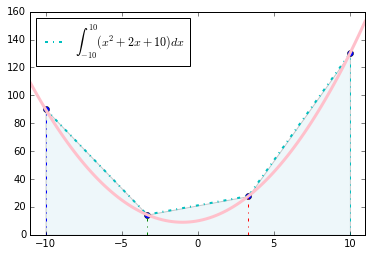

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def make_plot(dot=7):
    p = np.poly1d( [1, 2, 10]) 
    x1 = np.linspace(-11, 11, 100)
    x2 = np.linspace(-10, 10, dot)
    y1 = p(x1)
    y2 = p(x2)

    plt.xlim(-11, 11)

    stemline = plt.stem(x2, y2, '-.')
    plt.plot(x2, y2, '-.', linewidth=2, color='c')

    plt.plot(x1, y1, color='pink', linewidth=3)

    ax = plt.gca()
    ax.fill_between(x2, y2, where=y2>0, facecolor='lightblue', alpha=0.2)

    plt.legend(['$\int_{-10}^{10}(x^2+2x+10)dx$'], loc=2)
    
interact(make_plot, dot=(3, 10, 1))

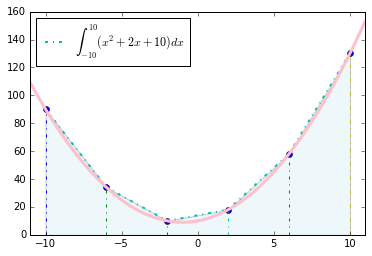

In [24]:
# 滑动滑块，上图梯形个数为3， 下图梯形个数为5

## 小练习及笔记
### 1. 绘制地图 : 世界人口最多的10个国家
1.  引入地图包cartopy
2.  获取世界地图   
    ax = plt.axes(projection=ccrs.PlateCarree())    
    ax.stock_img()
3.  设置地点经纬度，描点，调整图点大小   
问题：图中巴基斯坦的图点和印度重合了   
解决思路：设置图点大小由浅入深，让巴基斯坦的图点色比印度的更深
4.  标记国家名称

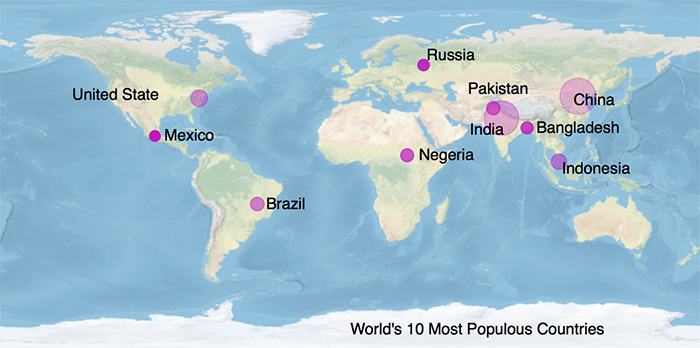

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(116.23, 39.54, s=760, color='m', alpha = 0.25)
plt.text(114, 35, 'China')

plt.scatter(77.13, 28.38, s=693,color='m', alpha = 0.3)
plt.text(61, 20, 'India')

plt.scatter(-77.2, 38.53, s=160, color='m', alpha = 0.4)
plt.text(-142, 38, 'United State')

plt.scatter(106.48, 6.12, s=136, color='m', alpha = 0.45)
plt.text(108, 0, 'Indonesia')

plt.scatter(-47.54, -15.48, s=107, color='m', alpha = 0.5)
plt.text(-43, -18, 'Brazil')

plt.scatter(73.04, 33.43, s=101,color='m', alpha = 0.6)
plt.text(60, 41, 'Pakistan')

plt.scatter(29, 9.4, s=97, color='m', alpha = 0.7)
plt.text(35, 7, 'Negeria')

plt.scatter(90.22, 23.42, s=84, color='m', alpha = 0.8)
plt.text(95, 21, 'Bangladesh')

plt.scatter(37.37, 55.45, s=76, color='m', alpha = 0.9)
plt.text(39, 58, 'Russia')

plt.scatter(-99.8, 19.26, s=67, color='m', alpha = 1.0)
plt.text(-95, 17, 'Mexico')

plt.text(0, -82, "World's 10 Most Populous Countries")

plt.show()

### 2. 画子图
1. figure() 新建画布
2. plt.subplot(234) 两行三列第4个图

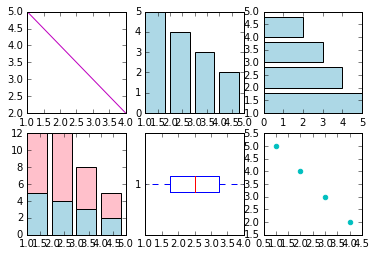

In [86]:
x = [1,2,3,4]
y = [5,4,3,2]
plt.figure()
plt.subplot(231)
plt.plot(x,y, color='m')
plt.subplot(232)
plt.bar(x,y, color='lightblue')
plt.subplot(233)
plt.barh(x,y, color='lightblue')
plt.subplot(234)
plt.bar(x,y, color='lightblue')
y1 = [7,8,5,3]
plt.bar(x,y1,bottom=y,color='pink')
plt.subplot(235)
plt.boxplot(x, vert=False)
# vert 竖置图片
plt.subplot(236)
plt.scatter(x,y, color='c')
plt.show()

### 3. 填充颜色   
ax.fill_between(x, y1, y2, where=y2>=y1, facecolor='darkblue', interpolate=True)

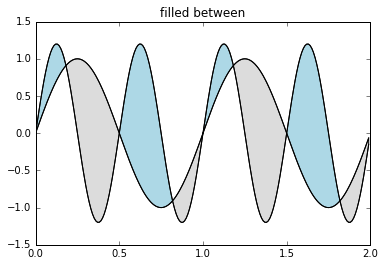

In [18]:
from matplotlib.pyplot import figure, show, gca
import numpy as np
x = np.arange(0.0, 2, 0.01)

y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)
fig = figure()
ax = gca()

ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>=y1, facecolor='lightblue',
interpolate=True)
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='gainsboro',
interpolate=True)
ax.set_title('filled between')
show()

### 4. 设置颜色
Alias Color  
b Blue  
g Green   
c Cyan  
m Magenta     
k Black     
#### Stackoverflow 热心网友分享的色表
http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
![color](http://i.stack.imgur.com/fMx2j.png)

In [5]:
import matplotlib.pyplot as plt
plt.subplot(111, axisbg=(0.0843, 0.4098, 0.3098))
plt.plot(x)
plt.title('Title', color='#E0FFFF')
plt.show()

###  5. ipywidgets.interact交互功能列表



- True or False       | 复选框     
- 'Hi there'          | 文本框     
- value or (min,max) or (min,max,step) if integers are passed | 数字滑块     
- value or (min,max) or (min,max,step) if floats are passed | 字符滑块
- ('orange','apple') or {'one':1,'two':2} |下拉菜单  

In [6]:
from ipywidgets import FloatSlider
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5),__manual=True)

<function __main__.slow_function>

## Seaborn绘图

### 1. 基本绘图
- axes_style('darkgrid') 带网格暗底背景
- sns.set_style("ticks") 显示坐标轴标记
- sns.set_context("talk") 下面四个词，对应图像从小到大的四个尺寸    
paper, notebook, talk, and poster 

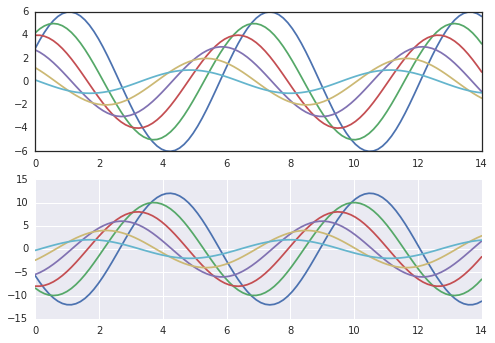

In [14]:
import numpy as np
import seaborn as sns
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
with sns.axes_style("white"):
    sns.set_context("notebook")
    plt.subplot(211)
    sinplot()

plt.subplot(212)
sinplot(-2)

### 2. 联合分布 Joint distribution
sns.jointplot(x, y, 图点类型, 统计方程, 颜色设置).set_axis_labels('x', 'y')

#### kind
- hex 蜂窝图
- kde 形似等高线，颜色外到内变深图
- reg 回归
- default 相关

#### stat_func
- spearmanr 非参相关

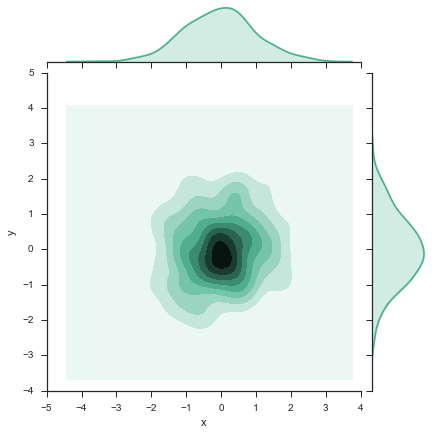

In [51]:
x, y = np.random.randn(2, 500)
g = (sns.jointplot(x, y, kind="kde", stat_func=None, color="#4CB391")
     .set_axis_labels("x", "y"))

### 3. 显示变量之间的相交情况 pairplot 
- size 每个子图的高
- hue 变量列表的标题

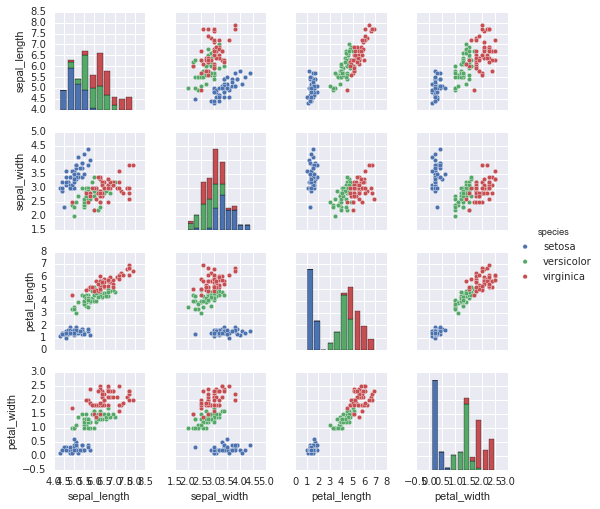

In [15]:
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue='species', size=1.8)